In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("C:\\Users\\2211444\\Desktop\\Udemy Python Masterclass\\UNZIP_FOR_NOTEBOOKS_FINAL\\DATA\\gene_expression.csv")

In [4]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


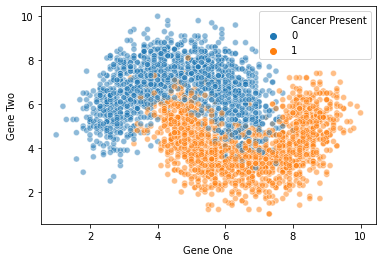

In [10]:
sns.scatterplot(x='Gene One',y='Gene Two',data=df,hue='Cancer Present',alpha=0.5)
#plt.xlim(2,6)
#plt.ylim(4,8)

In [6]:
len(df)

3000

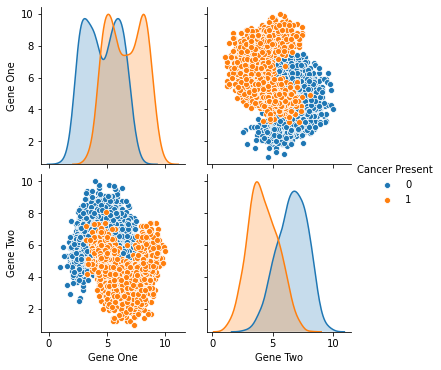

In [11]:
sns.pairplot(data=df,hue='Cancer Present')

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
X=df.drop('Cancer Present',axis=1)
y=df['Cancer Present']

In [15]:
 X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

In [16]:
scaler= StandardScaler()

In [17]:
scaled_X_train=scaler.fit_transform(X_train)

In [18]:
scaled_X_test=scaler.transform(X_test)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
knn_model=KNeighborsClassifier(n_neighbors=1)

In [21]:
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [23]:
y_pred=knn_model.predict(scaled_X_test)

In [25]:
from sklearn.metrics import confusion_matrix,classification_report

In [26]:
confusion_matrix(y_pred,y_test)

array([[382,  31],
       [ 41, 446]], dtype=int64)

we see that (41+31)=72 points are not correctly classified out of total 900 observations

In [27]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       413
           1       0.94      0.92      0.93       487

    accuracy                           0.92       900
   macro avg       0.92      0.92      0.92       900
weighted avg       0.92      0.92      0.92       900



So we see that the precision and recall value are close to the accuracy score , hence our model is correct

In [28]:
df['Cancer Present'].value_counts()

1    1500
0    1500
Name: Cancer Present, dtype: int64

In [29]:
from sklearn.metrics import accuracy_score

In [34]:
1-accuracy_score(y_test,y_pred)

0.07999999999999996

In [37]:
test_error_rates=[]

for k in range(1,30):
    knn_model=KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train)
    
    y_pred_test=knn_model.predict(scaled_X_test)
    
    test_error=1-accuracy_score(y_test,y_pred_test)
    
    test_error_rates.append(test_error)
    
                                  

In [38]:
test_error_rates

[0.07999999999999996,
 0.0855555555555556,
 0.06666666666666665,
 0.06666666666666665,
 0.06777777777777783,
 0.06000000000000005,
 0.06555555555555559,
 0.061111111111111116,
 0.06555555555555559,
 0.06222222222222218,
 0.06666666666666665,
 0.06333333333333335,
 0.06555555555555559,
 0.06444444444444442,
 0.06666666666666665,
 0.061111111111111116,
 0.06000000000000005,
 0.061111111111111116,
 0.06222222222222218,
 0.06444444444444442,
 0.06222222222222218,
 0.06666666666666665,
 0.061111111111111116,
 0.05888888888888888,
 0.06222222222222218,
 0.06555555555555559,
 0.06222222222222218,
 0.06000000000000005,
 0.061111111111111116]

As k increases we see the error rate falling down

Text(0.5, 0, 'K Neighbors')

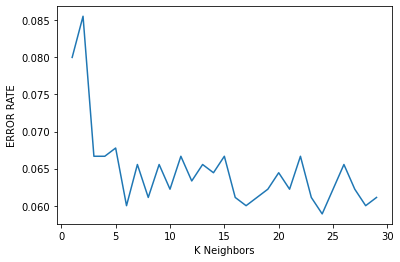

In [39]:
plt.plot(range(1,30),test_error_rates)
plt.ylabel('ERROR RATE')
plt.xlabel('K Neighbors')

## Setting up Pipeline

In [40]:


scaler=StandardScaler()

knn=KNeighborsClassifier()

In [41]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [42]:
operations=[('scaler',scaler),('knn',knn)]

In [43]:
from sklearn.pipeline import Pipeline

In [44]:
pipe=Pipeline(operations)

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
k_values=list(range(1,20))

In [47]:
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [48]:
param_grid={'knn__n_neighbors':k_values}

In [50]:
full_cv_classifier=GridSearchCV(pipe,param_grid,cv=5,
                               scoring='accuracy')

In [51]:
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [53]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=19))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=19),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 19,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [54]:
full_pred=full_cv_classifier.predict(X_test)

In [55]:
print(classification_report(y_test,full_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       423
           1       0.93      0.95      0.94       477

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



In [56]:
new_patient=[[3.8,6.4]]

In [57]:
full_cv_classifier.predict(new_patient)

array([0], dtype=int64)

In [58]:
full_cv_classifier.predict_proba(new_patient)

array([[0.78947368, 0.21052632]])